# Exploration Budgetierung

In [2]:
import pandas as pd
import datetime

## Setzen von Start- und Enddatum

In [12]:
Start = pd.Timestamp('today').normalize() + datetime.timedelta(days=23)
print(today)
End = today + datetime.timedelta(weeks= 32)
print(end)

2019-01-01 00:00:00
2019-08-13 00:00:00


## Setzen des initialen Budgetcalendar

In [34]:
budget_calendar = pd.DataFrame(index=pd.date_range(start=Start, end= End))

## Befüllung von fixen Einkommen

Gehalt Lilly:

In [35]:
März = pd.Timestamp(2019, 3, 1).normalize()
gehalt_lilly_bis_März = pd.DataFrame(
    data={'Gehalt_Lilly_bis':  2126},
    index= pd.date_range(start=Start, end=März, freq='BM')
)

gehalt_lilly_ab_März = pd.DataFrame(
    data={'Gehalt_Lilly_ab':  2297 },
    index= pd.date_range(start=März, end=End, freq='BM')
)
gehalt_lilly_ab_März


,Gehalt_Lilly_ab
2019-03-29,2297
2019-04-30,2297
2019-05-31,2297
2019-06-28,2297
2019-07-31,2297


Gehalt Keksi:

In [36]:
gehalt_keksi = pd.DataFrame(
    data={'Gehalt_Keksi': 2742 },
    index = pd.date_range(start=Start, end=End, freq='BM')                        
                           )

In [50]:
budget_calendar

,Gehalt_Keksi,Gehalt_Lilly_ab,Gehalt_Lilly_bis,Summe_Gehälter,Miete
2019-01-01,0.0,0.0,0.0,NaN,-770.0
2019-01-02,0.0,0.0,0.0,NaN,0.0
2019-01-03,0.0,0.0,0.0,NaN,0.0
2019-01-04,0.0,0.0,0.0,NaN,0.0
2019-01-05,0.0,0.0,0.0,NaN,0.0
2019-01-06,0.0,0.0,0.0,NaN,0.0
2019-01-07,0.0,0.0,0.0,NaN,0.0
2019-01-08,0.0,0.0,0.0,NaN,0.0
2019-01-09,0.0,0.0,0.0,NaN,0.0
2019-01-10,0.0,0.0,0.0,NaN,0.0


## Update Budget fixe Einnahmen

In [52]:
budget_calendar = pd.concat([budget_calendar, gehalt_keksi, gehalt_lilly_ab_März, gehalt_lilly_bis_März], axis= 1).fillna(0)
budget_calendar['Gehalt_Keksi'] = pd.to_numeric(budget_calendar['Gehalt_Keksi'])
budget_calendar['Gehalt_Lilly_bis'] = pd.to_numeric(budget_calendar['Gehalt_Lilly_bis'])
budget_calendar['Gehalt_Lilly_ab'] = pd.to_numeric(budget_calendar['Gehalt_Lilly_ab'])
budget_calendar['Summe_Gehälter'] = pd.to_numeric(budget_calendar['Summe_Gehälter'])
budget_calendar['Summe_Gehälter'] = budget_calendar.apply(lambda row: row['Gehalt_Keksi']+ row['Gehalt_Lilly_bis']+ row['Gehalt_Lilly_ab'], axis=1)
budget_calendar

,Gehalt_Keksi,Gehalt_Lilly_ab,Gehalt_Lilly_bis,Summe_Gehälter,Miete
2019-01-01,0.0,0.0,0.0,0.0,-770.0
2019-01-02,0.0,0.0,0.0,0.0,0.0
2019-01-03,0.0,0.0,0.0,0.0,0.0
2019-01-04,0.0,0.0,0.0,0.0,0.0
2019-01-05,0.0,0.0,0.0,0.0,0.0
2019-01-06,0.0,0.0,0.0,0.0,0.0
2019-01-07,0.0,0.0,0.0,0.0,0.0
2019-01-08,0.0,0.0,0.0,0.0,0.0
2019-01-09,0.0,0.0,0.0,0.0,0.0
2019-01-10,0.0,0.0,0.0,0.0,0.0


## Befüllung von fixen Ausgaben

In [40]:
Miete = pd.DataFrame(
    data= {'Miete':-770},
    index=pd.date_range(start=Start, end=End, freq='MS')
)
Miete

,Miete
2019-01-01,-770
2019-02-01,-770
2019-03-01,-770
2019-04-01,-770
2019-05-01,-770
2019-06-01,-770
2019-07-01,-770
2019-08-01,-770


## Update Budget fixe Ausgaben

In [41]:
budget_calendar = pd.concat([budget_calendar, Miete], axis= 1).fillna(0)
budget_calendar

,Gehalt_Keksi,Gehalt_Lilly_ab,Gehalt_Lilly_bis,Miete
2019-01-01,0.0,0.0,0.0,-770.0
2019-01-02,0.0,0.0,0.0,0.0
2019-01-03,0.0,0.0,0.0,0.0
2019-01-04,0.0,0.0,0.0,0.0
2019-01-05,0.0,0.0,0.0,0.0
2019-01-06,0.0,0.0,0.0,0.0
2019-01-07,0.0,0.0,0.0,0.0
2019-01-08,0.0,0.0,0.0,0.0
2019-01-09,0.0,0.0,0.0,0.0
2019-01-10,0.0,0.0,0.0,0.0


## Berechnung von Tages- und Endsaldo

In [87]:
budget_calendar['Tagessaldo'] = budget_calendar.sum(axis=1)
budget_calendar['Endsaldo'] = budget_calendar['Tagessaldo'].cumsum()
budget_calendar.tail(1)

,Gehalt_Keksi,Gehalt_Lilly_ab,Gehalt_Lilly_bis,Summe_Gehälter,Miete,Tagessaldo,Endsaldo,Jahresendsaldo
2019-08-13,0.0,0.0,0.0,0.0,0.0,63702.0,6746356.0,0.0


In [89]:
budget_calendar

,Gehalt_Keksi,Gehalt_Lilly_ab,Gehalt_Lilly_bis,Summe_Gehälter,Miete,Tagessaldo,Endsaldo,Jahresendsaldo
2019-01-01,0.0,0.0,0.0,0.0,-770.0,-1310.0,-1310.0,1000.0
2019-01-02,0.0,0.0,0.0,0.0,0.0,-770.0,-2080.0,0.0
2019-01-03,0.0,0.0,0.0,0.0,0.0,-770.0,-2850.0,0.0
2019-01-04,0.0,0.0,0.0,0.0,0.0,-770.0,-3620.0,0.0
2019-01-05,0.0,0.0,0.0,0.0,0.0,-770.0,-4390.0,0.0
2019-01-06,0.0,0.0,0.0,0.0,0.0,-770.0,-5160.0,0.0
2019-01-07,0.0,0.0,0.0,0.0,0.0,-770.0,-5930.0,0.0
2019-01-08,0.0,0.0,0.0,0.0,0.0,-770.0,-6700.0,0.0
2019-01-09,0.0,0.0,0.0,0.0,0.0,-770.0,-7470.0,0.0
2019-01-10,0.0,0.0,0.0,0.0,0.0,-770.0,-8240.0,0.0


## Visualisierung

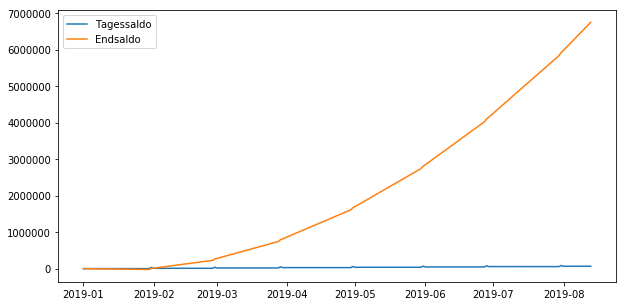

In [88]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(figsize=(10, 5))
plt.plot(budget_calendar.index, budget_calendar.Tagessaldo, label='Tagessaldo')
plt.plot(budget_calendar.index, budget_calendar.Endsaldo, label='Endsaldo')
plt.legend()

In [82]:
budget_calendar

,Gehalt_Keksi,Gehalt_Lilly_ab,Gehalt_Lilly_bis,Summe_Gehälter,Miete,Tagessaldo,Endsaldo
2019-01-01,0.0,0.0,0.0,0.0,-770.0,-770.0,-770.0
2019-01-02,0.0,0.0,0.0,0.0,0.0,0.0,-770.0
2019-01-03,0.0,0.0,0.0,0.0,0.0,0.0,-770.0
2019-01-04,0.0,0.0,0.0,0.0,0.0,0.0,-770.0
2019-01-05,0.0,0.0,0.0,0.0,0.0,0.0,-770.0
2019-01-06,0.0,0.0,0.0,0.0,0.0,0.0,-770.0
2019-01-07,0.0,0.0,0.0,0.0,0.0,0.0,-770.0
2019-01-08,0.0,0.0,0.0,0.0,0.0,0.0,-770.0
2019-01-09,0.0,0.0,0.0,0.0,0.0,0.0,-770.0
2019-01-10,0.0,0.0,0.0,0.0,0.0,0.0,-770.0


## Einmalige Codes

In [84]:
Jahresendsaldo1718 = 1000
bank = pd.DataFrame(
    data= {'Jahresendsaldo': Jahresendsaldo1718},
    index=pd.date_range(start=Start, end= Start)
)
bank

,Jahresendsaldo
2019-01-01,1000


In [85]:
budget_calendar = pd.concat([budget_calendar,bank],axis=1).fillna(0)

In [86]:
budget_calendar

,Gehalt_Keksi,Gehalt_Lilly_ab,Gehalt_Lilly_bis,Summe_Gehälter,Miete,Tagessaldo,Endsaldo,Jahresendsaldo
2019-01-01,0.0,0.0,0.0,0.0,-770.0,-770.0,-770.0,1000.0
2019-01-02,0.0,0.0,0.0,0.0,0.0,0.0,-770.0,0.0
2019-01-03,0.0,0.0,0.0,0.0,0.0,0.0,-770.0,0.0
2019-01-04,0.0,0.0,0.0,0.0,0.0,0.0,-770.0,0.0
2019-01-05,0.0,0.0,0.0,0.0,0.0,0.0,-770.0,0.0
2019-01-06,0.0,0.0,0.0,0.0,0.0,0.0,-770.0,0.0
2019-01-07,0.0,0.0,0.0,0.0,0.0,0.0,-770.0,0.0
2019-01-08,0.0,0.0,0.0,0.0,0.0,0.0,-770.0,0.0
2019-01-09,0.0,0.0,0.0,0.0,0.0,0.0,-770.0,0.0
2019-01-10,0.0,0.0,0.0,0.0,0.0,0.0,-770.0,0.0


In [66]:
budget_calendar = budget_calendar.drop(['Endsaldo'], axis=1)
budget_calendar

,Gehalt_Keksi,Gehalt_Lilly_ab,Gehalt_Lilly_bis,Summe_Gehälter,Miete,Tagessaldo
2019-01-01,0.0,0.0,0.0,0.0,-770.0,-770.0
2019-01-02,0.0,0.0,0.0,0.0,0.0,0.0
2019-01-03,0.0,0.0,0.0,0.0,0.0,0.0
2019-01-04,0.0,0.0,0.0,0.0,0.0,0.0
2019-01-05,0.0,0.0,0.0,0.0,0.0,0.0
2019-01-06,0.0,0.0,0.0,0.0,0.0,0.0
2019-01-07,0.0,0.0,0.0,0.0,0.0,0.0
2019-01-08,0.0,0.0,0.0,0.0,0.0,0.0
2019-01-09,0.0,0.0,0.0,0.0,0.0,0.0
2019-01-10,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
budget_calendar.insert(3, 'Summe_Gehälter', '')
budget_calendar

budget_calendar = pd.concat([budget_calendar, gehalt_keksi, gehalt_lilly_ab_März, gehalt_lilly_bis_März], axis= 1).fillna(0)
budget_calendar['Gehalt_Keksi'] = pd.to_numeric(budget_calendar['Gehalt_Keksi'])
budget_calendar['Gehalt_Lilly_bis'] = pd.to_numeric(budget_calendar['Gehalt_Lilly_bis'])
budget_calendar['Gehalt_Lilly_ab'] = pd.to_numeric(budget_calendar['Gehalt_Lilly_ab'])
budget_calendar['Summe_Gehälter'] = pd.to_numeric(budget_calendar['Summe_Gehälter'])

ValueError: cannot insert Summe_Gehälter, already exists

In [80]:
budget_calendar.Endsaldo

2019-01-01     -770.0
2019-01-02     -770.0
2019-01-03     -770.0
2019-01-04     -770.0
2019-01-05     -770.0
2019-01-06     -770.0
2019-01-07     -770.0
2019-01-08     -770.0
2019-01-09     -770.0
2019-01-10     -770.0
2019-01-11     -770.0
2019-01-12     -770.0
2019-01-13     -770.0
2019-01-14     -770.0
2019-01-15     -770.0
2019-01-16     -770.0
2019-01-17     -770.0
2019-01-18     -770.0
2019-01-19     -770.0
2019-01-20     -770.0
2019-01-21     -770.0
2019-01-22     -770.0
2019-01-23     -770.0
2019-01-24     -770.0
2019-01-25     -770.0
2019-01-26     -770.0
2019-01-27     -770.0
2019-01-28     -770.0
2019-01-29     -770.0
2019-01-30     -770.0
               ...   
2019-07-15    54394.0
2019-07-16    54394.0
2019-07-17    54394.0
2019-07-18    54394.0
2019-07-19    54394.0
2019-07-20    54394.0
2019-07-21    54394.0
2019-07-22    54394.0
2019-07-23    54394.0
2019-07-24    54394.0
2019-07-25    54394.0
2019-07-26    54394.0
2019-07-27    54394.0
2019-07-28    54394.0
2019-07-29

## Appendix: Beispiel date_range offsets

In [15]:
# semi-month end frequency (15th and end of month)
print('Semi-month End:')
sm = pd.date_range(start=Start, end=End, freq='SM')
print(sm)
print('\n')
# month start frequency
print('Month Start:')
ms = pd.date_range(start=Start, end=End, freq='MS')
print(ms)

Semi-month End:
DatetimeIndex(['2019-01-15', '2019-01-31', '2019-02-15', '2019-02-28',
               '2019-03-15', '2019-03-31', '2019-04-15', '2019-04-30',
               '2019-05-15', '2019-05-31', '2019-06-15', '2019-06-30',
               '2019-07-15', '2019-07-31'],
              dtype='datetime64[ns]', freq='SM-15')


Month Start:
DatetimeIndex(['2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01'],
              dtype='datetime64[ns]', freq='MS')
